# Multi-metric runs
------------------------------

This example shows how to evaluate an atom's pipeline on multiple metrics.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from atom import ATOMClassifier

In [2]:
# Get the dataset's features and targets
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [3]:
# Call ATOM and run the pipeline using multipe metrics
# Note that for every step of the BO, both metrics are calculated, but only the first is used for optimization!
atom = ATOMClassifier(X, y, n_jobs=1, verbose=2, warnings=False, random_state=1)
atom.run(["LDA", "QDA"], metric=("f1", "recall"), n_calls=10, n_initial_points=4, bagging=6)

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (569, 31)
Scaled: False
Outlier values: 174 (1.2%)
-------------------------------------
Train set size: 456
Test set size: 113
-------------------------------------
Train set balance: 0:1 <==> 1.0:1.7
Test set balance: 0:1 <==> 1.0:1.5
-------------------------------------
|    |   dataset |   train |   test |
|---:|----------:|--------:|-------:|
|  0 |       212 |     167 |     45 |
|  1 |       357 |     289 |     68 |


Training ===================================== >>
Models: LDA, QDA
Metric: f1, recall


Running BO for Linear Discriminant Analysis...
Initial point 1 ---------------------------------
Parameters --> {'solver': 'svd'}
Evaluation --> f1: 0.9651  Best f1: 0.9651   recall: 0.9931  Best recall: 0.9931
Time iteration: 0.046s   Total time: 0.052s
Initial point 2 ---------------------------------
Parameters --> {'solver': 'eigen', 'shrinkag

## Analyze the results

In [4]:
# Note that some columns in the results dataframe now contain a list
# of scores, one for each metric (in the same order as called)
atom.results[["metric_bo", "metric_train", "metric_test"]]

,metric_bo,metric_train,metric_test
LDA,"[0.9664952872439503, 0.9965517241379309]","[0.9729729729729729, 0.9965397923875432]","[0.9714285714285714, 1.0]"
QDA,"[0.963998965582012, 0.9723532970356927]","[0.9691780821917808, 0.9792387543252595]","[0.9784172661870503, 1.0]"


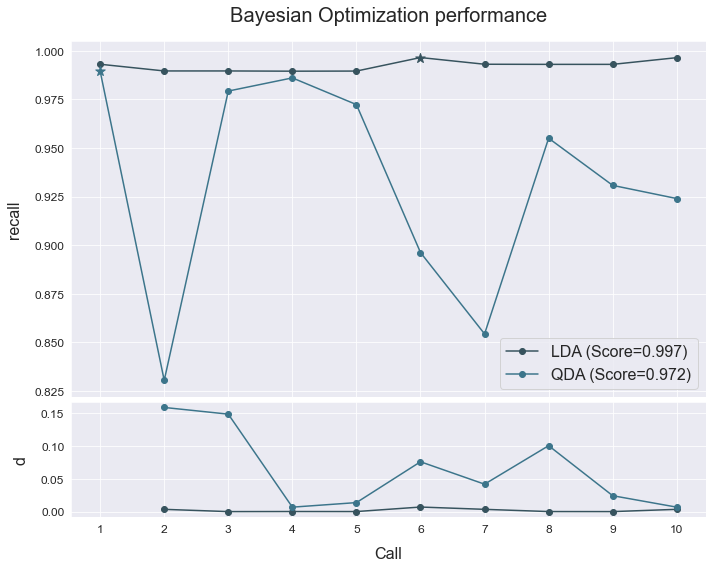

In [5]:
# Some plots allow us to choose the metric we want to show
atom.plot_bo(metric="recall", title="Bayesian Optimization performance")

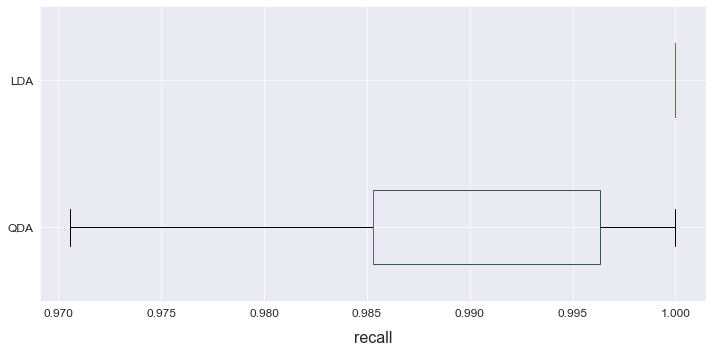

In [6]:
atom.plot_results(metric="recall")